In [20]:
import numpy as np
import matplotlib.pyplot as plt

SMALL_SIZE = 10
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

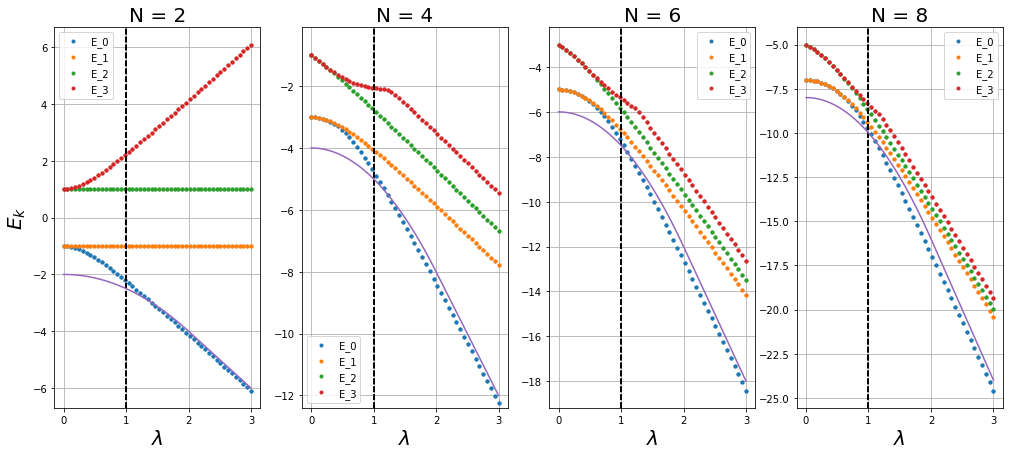

In [95]:
def th_gs_density(h):
    if (np.abs(h) <= 2):
        return (-1 - (h**2)/4)
    else:
        return (-np.abs(h))
    
gs_xs = np.linspace(0,3)
        
ground = []

for el in gs_xs:
    ground.append(th_gs_density(el))


k = 4
fig, axes = plt.subplots(1, 4, figsize = (17,7))

counter = [0, 1, 2, 3]
num = [2, 4, 6, 8]
for ii in counter:

    fname = "eigs_" + str(num[ii]) + ".txt"

    all_eigs = np.genfromtxt(fname)

    hs   = all_eigs[:,0]
    eigs = all_eigs[:,2]

    for c in range(k):
        xs = []
        ys = []
        for l in range(int(len(hs)/4)): 
            x = hs[k*l + c]
            y = eigs[k*l + c]

            xs.append(x)
            ys.append(y)
            
        if (ii == 1):
            axes[ii].set_ylim([-12.4, -0.1])
            
        axes[ii].plot(xs, ys, '.', label = 'E_' + str(c))
        axes[ii].legend()
        
        axes[ii].set_xlabel(r'$\lambda$')
        axes[ii].set_title('N = ' + str(num[ii]))
        axes[0].set_ylabel(r'$E_k$')
        axes[ii].grid(True)
        axes[ii].axvline(x = 1, linestyle = '--', color = 'black')
    
    axes[ii].plot(gs_xs, num[ii]*np.array(ground), label = r'$Ne_{th}$')

plt.savefig("requestns")
        

0.06369483333333333 1.4032896666666668


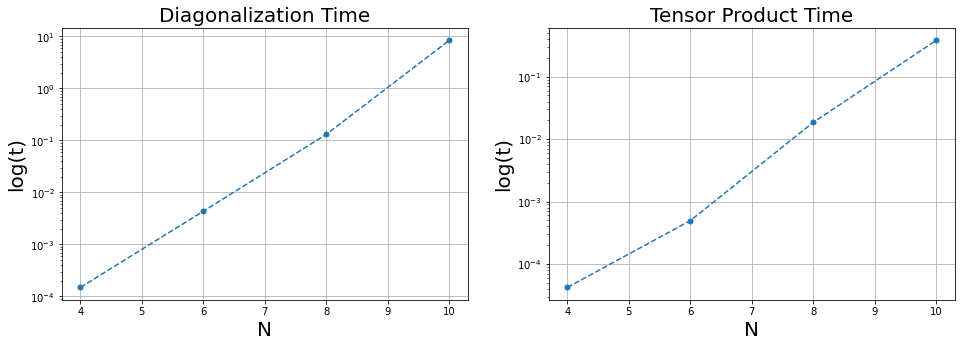

In [79]:
fig, ax = plt.subplots(1,2 , figsize = (16,5))

dtime = np.genfromtxt('diag_times.txt')
ns = dtime[:,0][2:]
ts = dtime[:,1][2:]

ax[0].plot(ns, ts, '.--', markersize = 10)
ax[0].set_xlabel('N')
ax[0].set_ylabel('log(t)')
ax[0].set_title('Diagonalization Time')
ax[0].set_yscale('log')
ax[0].grid(True)

tentime = np.genfromtxt('tensor_times.txt')
nt = tentime[:,0][2:]
tt = tentime[:, 1][2:]


ax[1].plot(nt, tt, '.--', markersize = 10)
ax[1].set_xlabel('N')
ax[1].set_ylabel('log(t)')
ax[1].set_title('Tensor Product Time')
ax[1].set_yscale('log')
ax[1].grid(True)

mt = 0
for ii in range(1,4):
    mt = mt + (tt[ii] - tt[ii-1])/(nt[ii] - nt[ii-1]) 

md = 0
for ii in range(1,4):
    md = md + (ts[ii] - ts[ii-1])/(ns[ii] - ns[ii-1]) 

print(mt/3, md/3)

plt.savefig('timevs')

In [ ]:
for 